<b>Excercise 1</b>

Import Data1.csv file to python. 

Set first column as the index.

Plot all columns as time series.

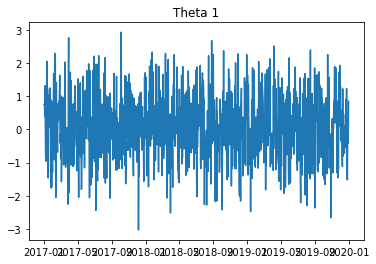

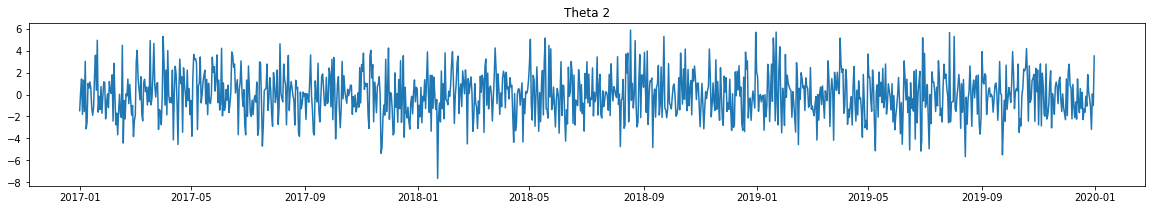

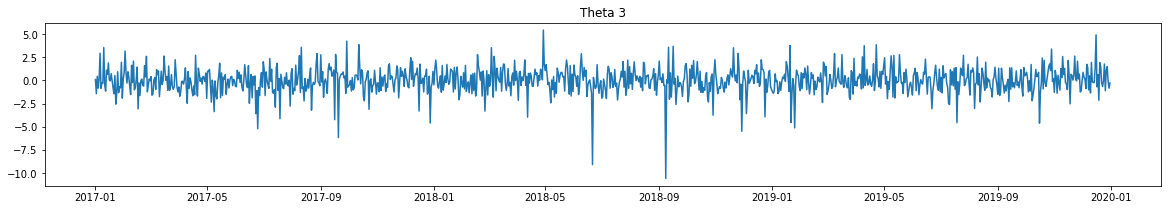

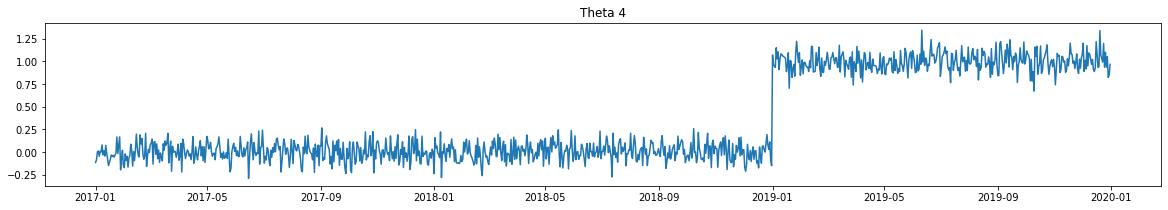

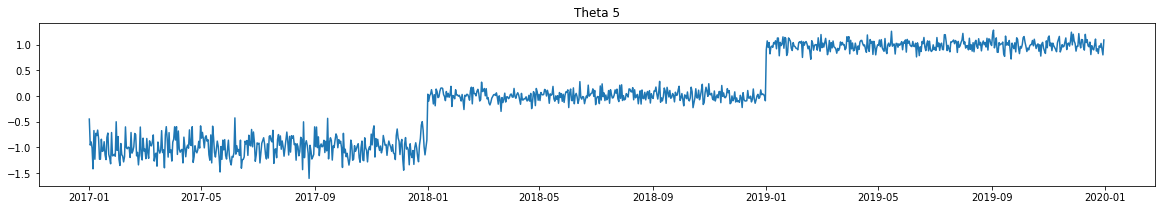

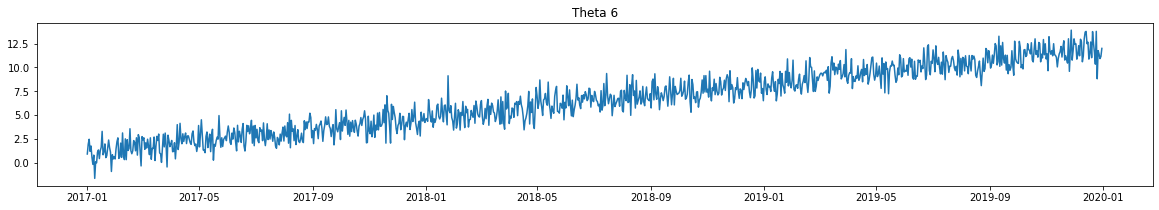

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

def make_plot(x: list, y:list, title: str = '') -> None:
    plt.rcParams["figure.figsize"] = (20,3)
    plt.title(title)
    plt.plot(x, y)
    plt.show() 


csv_data = pd.read_csv('Data/Data1.csv', index_col='Unnamed: 0')

for idx in range(1, len(csv_data.columns)+1):
    make_plot([datetime.datetime.strptime(str(elem),'%Y-%m-%d') for elem in csv_data.index], csv_data.iloc[:, idx-1], title=f'Theta {idx}')


Plot histograms of all columns, verify bin size. Plot all on a single, faceted plot.

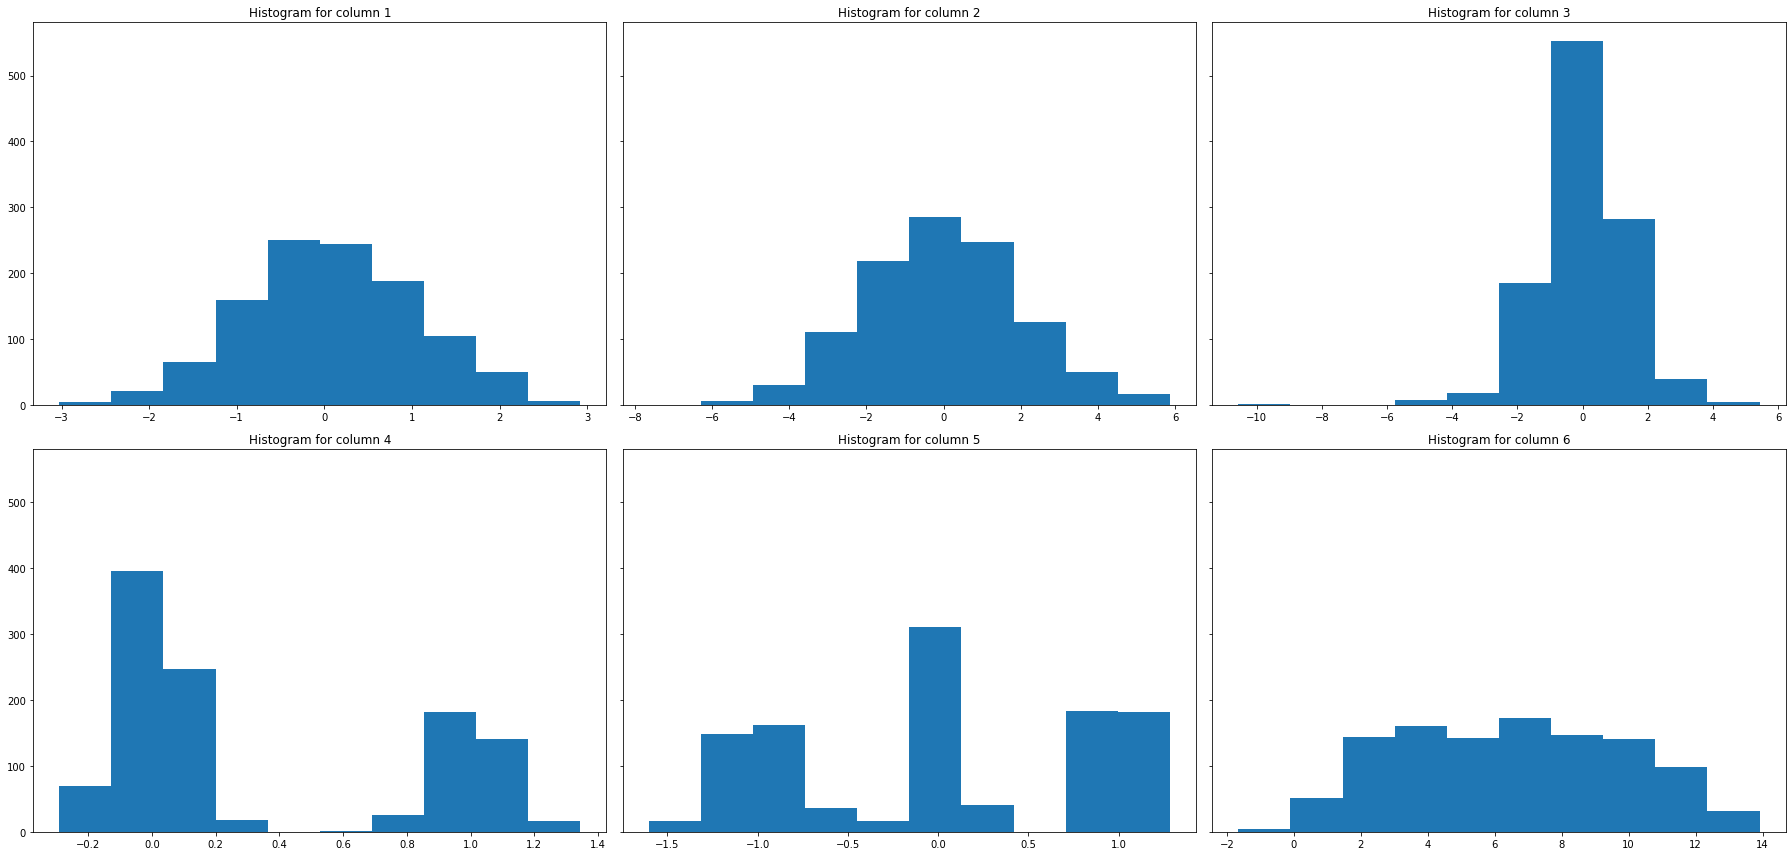

In [2]:
fig, axs = plt.subplots(2, 3, sharey=True, tight_layout=True)
fig.set_size_inches(25,12)
for idx in range(1,len(csv_data.columns)+1):
    axs[int((idx-1)/3),(idx-1)%3].hist(csv_data.iloc[:, idx-1])
    axs[int((idx-1)/3),(idx-1)%3].set_title(f'Histogram for column {idx}')

Plot KDE-s (Kernel Denisty Estimators) for all columns.

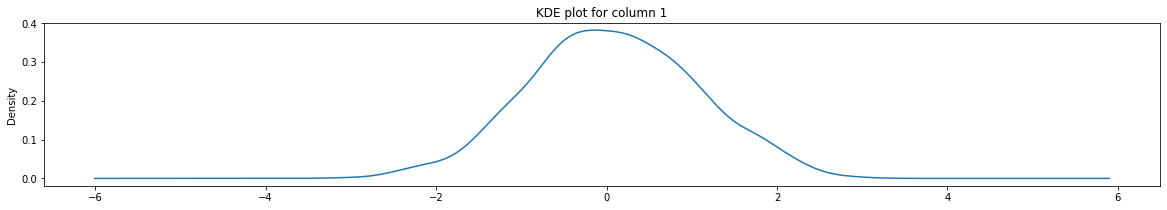

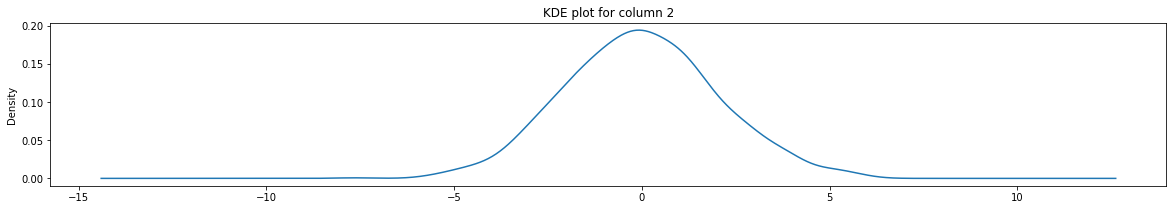

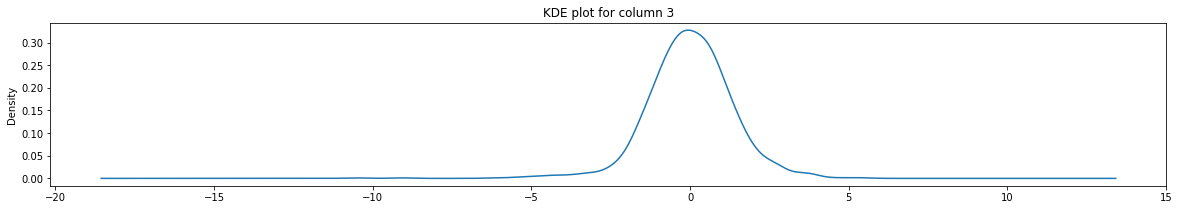

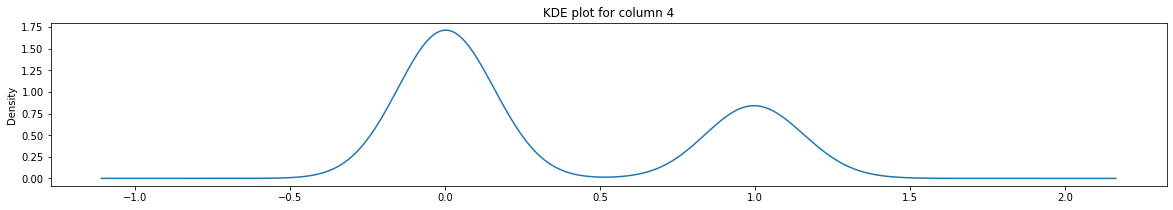

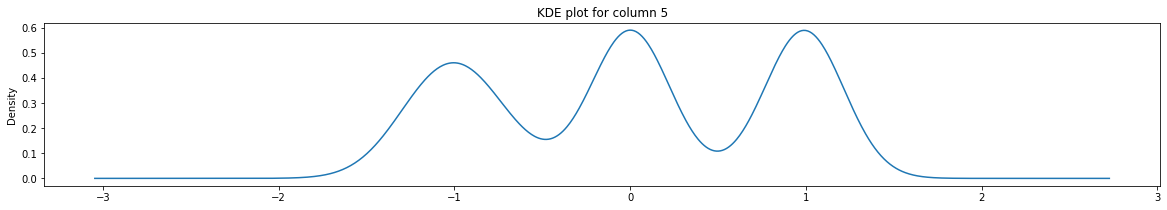

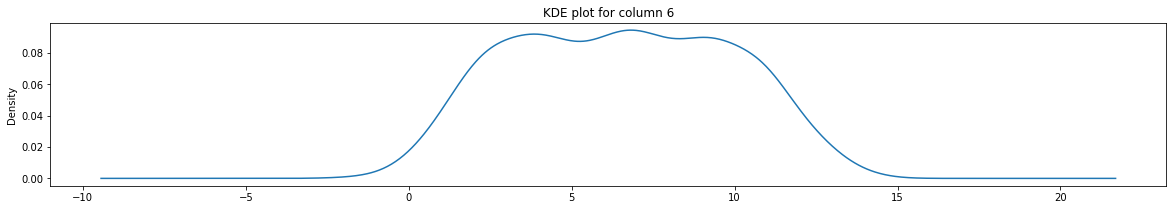

In [3]:
for idx in range(1,len(csv_data.columns)+1):
    csv_data.iloc[:, idx-1].plot.kde(title=f'KDE plot for column {idx}')
    plt.show() 

Repeat analysis for columns $\theta_1$-$\theta_4$ in 2018.

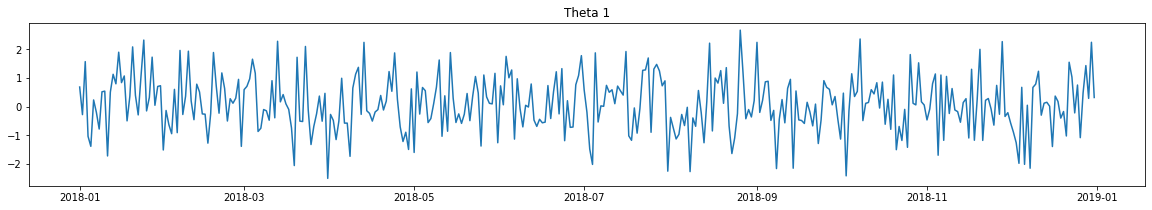

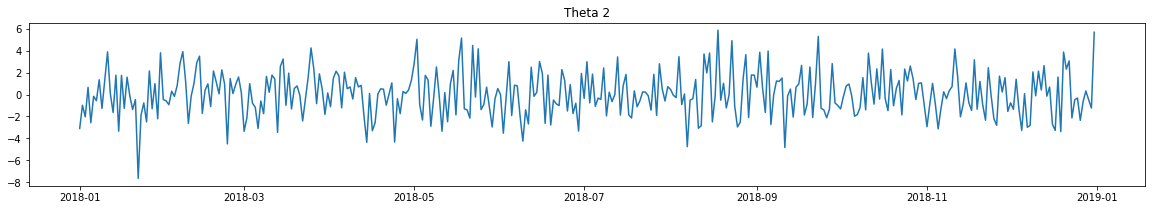

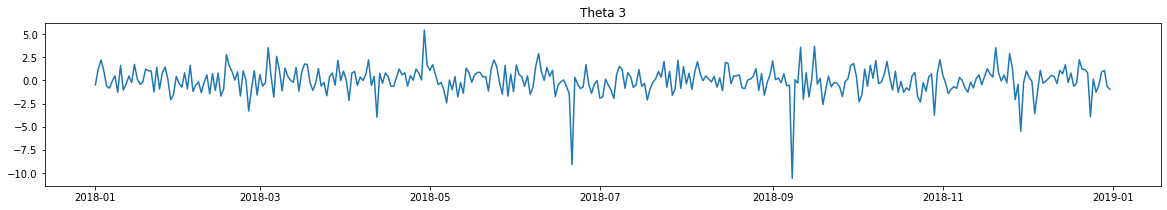

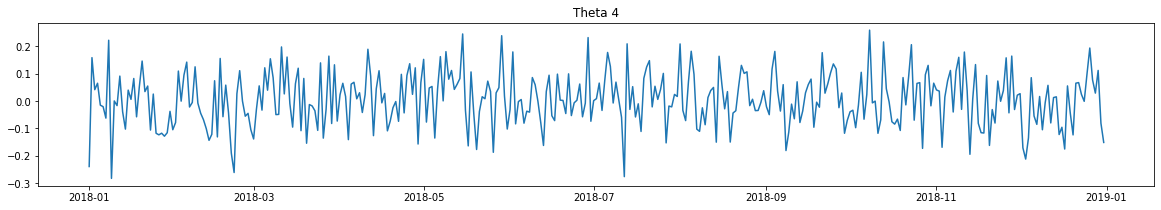

In [4]:
csv_data = csv_data.loc['20170101':'20181231',['theta_1','theta_2','theta_3','theta_4']]

for idx in range(1, len(csv_data.columns)+1):
    make_plot([datetime.datetime.strptime(str(elem),'%Y-%m-%d') for elem in csv_data.index], csv_data.iloc[:, idx-1], title=f'Theta {idx}')

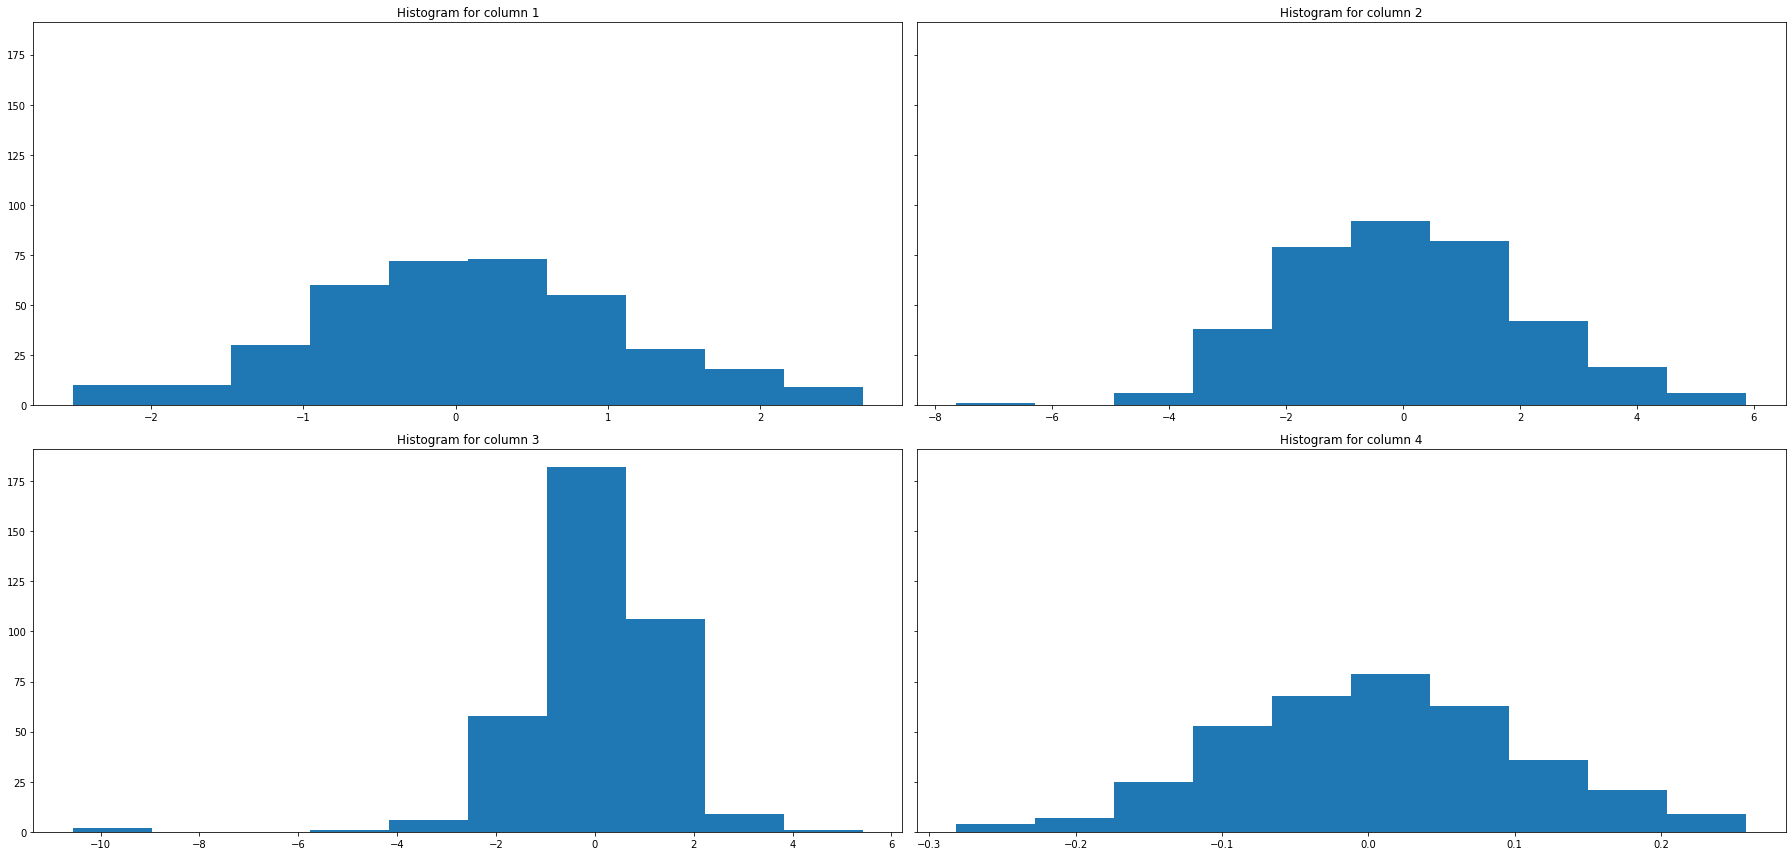

In [5]:
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)
fig.set_size_inches(25,12)
for idx in range(1,len(csv_data.columns)+1):
    axs[int((idx-1)/2),(idx-1)%2].hist(csv_data.iloc[:, idx-1])
    axs[int((idx-1)/2),(idx-1)%2].set_title(f'Histogram for column {idx}')

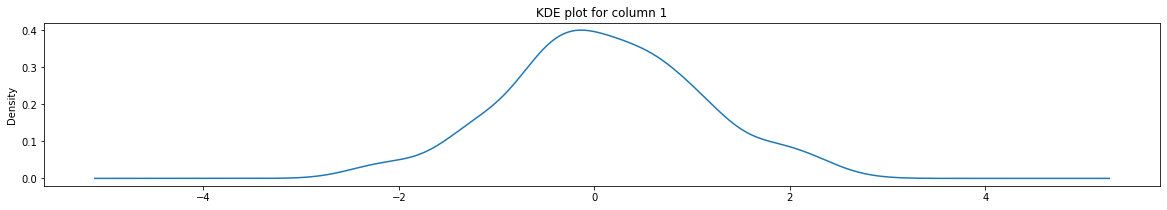

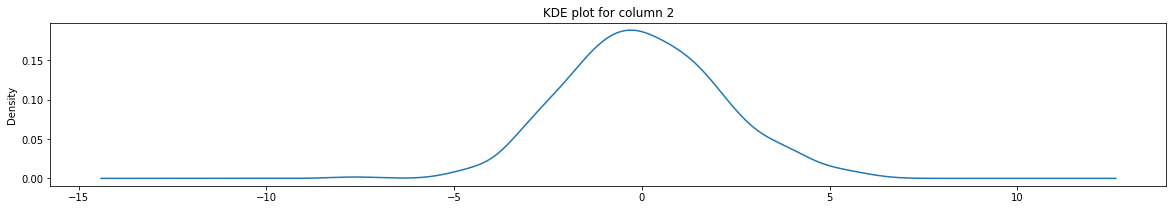

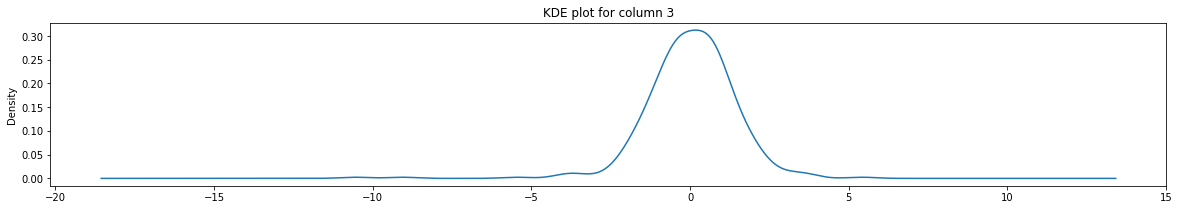

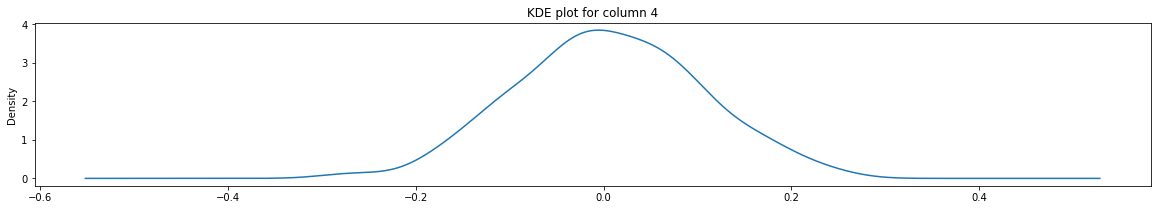

In [6]:
for idx in range(1,len(csv_data.columns)+1):
    csv_data.iloc[:, idx-1].plot.kde(title=f'KDE plot for column {idx}')
    plt.show() 

<b>Excercise 2</b>

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


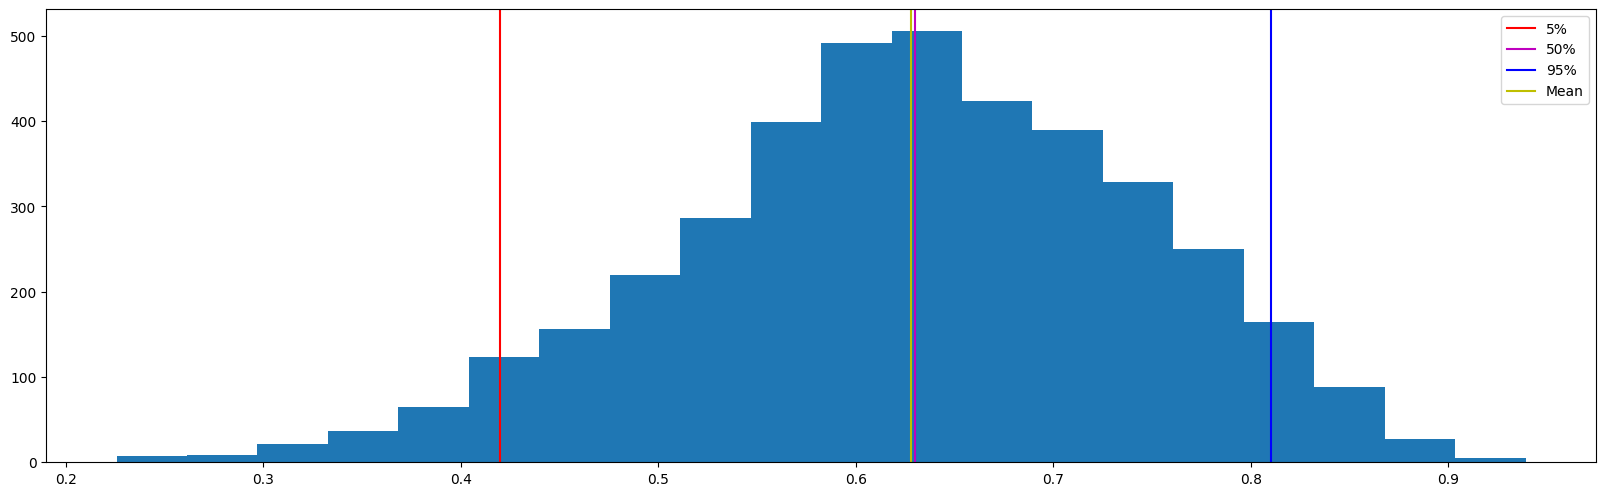

In [7]:
import cmdstanpy
import random 

data = {'N': 14, 'y': random.sample([0]*5 + [1]*9, 14)}

model = cmdstanpy.CmdStanModel(stan_file='Data/bern_1.stan')
sample = model.sample(data)
theta = sample.stan_variable('theta') 
summary = sample.summary()

plt.figure(figsize=(20,6), dpi=100)
plt.hist(theta, bins=20)
plt.axvline(summary['5%']['theta'], color='r')
plt.axvline(summary['50%']['theta'], color='m')
plt.axvline(summary['95%']['theta'], color='b')
plt.axvline(theta.mean(), color='y')
plt.legend(['5%','50%','95%','Mean'])
plt.show()